# Linear Algebra Review

This review is meant to provide an introduction to vectors, matrices, and their operations, basic topics in applied and numerical linear algebra. The goal is to develop a good understanding of these basic concepts that later will be used in many applications, such as data fitting, machine learning and artificial intelligence, tomography, navigation, image processing, finance, and automatic control systems.

### An Example of Linear Algebra

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t = np.linspace(0, 40, 1000) # start, finish, n points

Distance travelled by robber: $d = 2t$

In [ ]:
d_r = 2 * t

Distance travelled by sheriff: $d = 3(t-5)$

In [ ]:
d_s = 3 * (t-5)

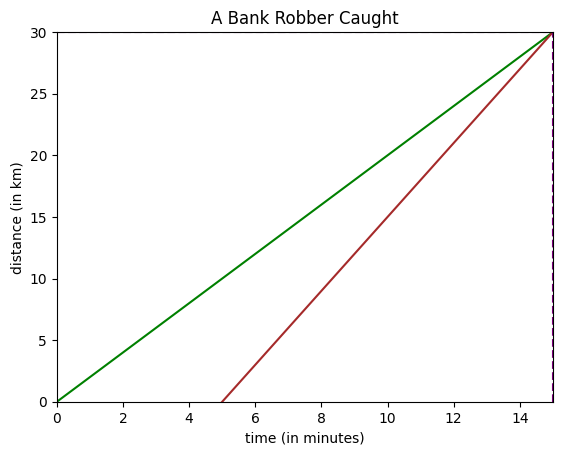

In [ ]:
fig, ax = plt.subplots()
plt.title('A Bank Robber Caught')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in km)')
ax.set_xlim([0, 15])
ax.set_ylim([0, 30])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')
plt.axvline(x=15, color='purple', linestyle='--')
_ = plt.axhline(y=30, color='purple', linestyle='--')

## Data Structures for Linear Algebra

We first introduce tensors, the fundamental data structure of linear algebra.

### Scalars (Rank 0 Tensors) in Base Python

In [ ]:
x = 25
x

25

In [ ]:
type(x) # if we'd like more specificity (e.g., int16, uint8), we need NumPy or another numeric library

int

In [ ]:
y = 3

In [ ]:
py_sum = x + y
py_sum

28

In [ ]:
type(py_sum)

int

In [ ]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [ ]:
type(float_sum)

float

### Scalars in PyTorch and TensorFlow

* PyTorch and TensorFlow are the two most popular libraries in Python, which are the most popular programming language in ML.
* PyTorch tensors feel and behave like NumPy arrays.
* The advantage of PyTorch/TensorFlow tensors relative to NumPy arrays is that they can easily be used for operations on GPU.
* Documentation on PyTorch tensors, including available data types, is [here](https://pytorch.org/docs/stable/tensors.html).

### Scalars in PyTorch

In [ ]:
import torch

In [ ]:
x_pt = torch.tensor(5.) # type specification optional, e.g.: dtype=torch.float16
x_pt

tensor(5.)

In [ ]:
x_pt.shape

torch.Size([])

In [ ]:
x_pt.ndim

0

### Scalars in TensorFlow

Tensors created with a wrapper, all of which [you can read about here](https://www.tensorflow.org/guide/tensor):  

* `tf.Variable`
* `tf.constant`
* `tf.placeholder`
* `tf.SparseTensor`

Most widely-used is `tf.Variable`, which we'll use here.

As with TF tensors, in PyTorch we can similarly perform operations, and we can easily convert to and from NumPy arrays.

Also, a full list of tensor data types is available [here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

In [ ]:
import tensorflow as tf

In [ ]:
x_tf = tf.Variable(5, dtype=tf.int16) # dtype is optional
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=5>

In [ ]:
x_tf.shape

TensorShape([])

In [ ]:
y_tf = tf.Variable(3, dtype=tf.int16)

In [ ]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=8>

In [ ]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=8>

In [ ]:
tf_sum.numpy() # note that NumPy operations automatically convert tensors to NumPy arrays, and vice versa

np.int16(8)

In [ ]:
type(tf_sum.numpy())

numpy.int16

In [ ]:
tf_float = tf.Variable(25., dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

### Vectors (Rank 1 Tensors) in NumPy

In [ ]:
x = np.array([25, 2, 5]) # type argument is optional, e.g.: dtype=np.float16
x

array([25,  2,  5])

In [ ]:
len(x)

3

In [ ]:
x.shape

(3,)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x[0] # zero-indexed

25

In [ ]:
type(x[0])

numpy.int64

In [ ]:
a = x
b = (25, 2, 5)
a,b #a is a vector, b is a tuple of scalars

(array([25,  2,  5]), (25, 2, 5))

In [ ]:
#Assignment and Copying

x = np.array([-1.1,0.0,3.6,-7.2])
y = x
x[3] = 4.0
print(x,y)
y[1] = 2.0
print(x,y)

x = np.array([-1.1,0.0,3.6,-7.2])
y = x.copy()
x[2] = 4.0
y[0] = 2.0
print(x,y)
x == y

[-1.1  0.   3.6  4. ] [-1.1  0.   3.6  4. ]
[-1.1  2.   3.6  4. ] [-1.1  2.   3.6  4. ]
[-1.1  0.   4.  -7.2] [ 2.   0.   3.6 -7.2]


array([False,  True, False,  True])

In [ ]:
x = np.array([1,-2]); y = np.array([1,1,0]);
z = np.concatenate((x,y))
z

array([ 1, -2,  1,  1,  0])

In [ ]:
x = np.array([9,4,3,0,5])
y = x[1:4] #slicing is: [inclusive:exclusive]
z = x[2:0:-1] #reverse slice is: [::-1] ie [start:end:increment]
y,z

(array([4, 3, 0]), array([3, 4]))

In [ ]:
#Vector of First Differences
x = np.array([1,0,0,-2,2])
np.array([x[i+1]-x[i] for i in range(len(x)-1)])

array([-1,  0, -2,  4])

In [ ]:
x = np.array([1.0,0]);y = ([1.0,-1.0]);z = ([0,1.0])
lst0 = np.array([x,y,z])
lst1 = (x,y,z)
lst0 == lst1

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

In [ ]:
# Zero Vectors, Unit Vectors, Ones Vector, Random Vector
i = 1; n =3
x = np.zeros(n)
x[i] = 1
y = np.ones(n)
z = np.random.randn(n)
w = [np.random.randint(60,80) for i in range(40)]
x,y,z,w

(array([0., 1., 0.]),
 array([1., 1., 1.]),
 array([-1.36554069,  0.55111539, -0.71069972]),
 [61,
  62,
  73,
  62,
  76,
  62,
  78,
  65,
  79,
  69,
  75,
  65,
  76,
  74,
  62,
  68,
  79,
  68,
  65,
  71,
  70,
  78,
  64,
  62,
  65,
  77,
  76,
  76,
  68,
  73,
  68,
  60,
  68,
  62,
  72,
  66,
  61,
  70,
  63,
  77])

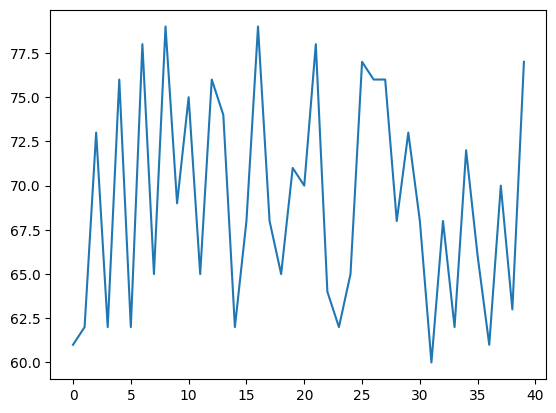

In [ ]:
import matplotlib.pyplot as plt
plt.plot(w)
#plt.savefig('temps.png')

### Vector Addition, Scalar-Vector Multiplication & Addition

In [ ]:
x = np.array([0.,2.,-1.])
y = np.array([3,1,2])
z = 2*x
h1 = y/3
h2 = 3/x
w = x + y + 0.7


/tmp/ipython-input-3275763260.py:5: RuntimeWarning: divide by zero encountered in divide
  h2 = 3/x


In [ ]:
x[0:2] = [-1,1]
x[1:2] = 1.3
x

array([-1. ,  1.3, -1. ])

### Linear Combination

In [ ]:
coef = ([-.5,1.5])
vecs = [np.array([1,2]),np.array([3,4])]

def lincomb(coeff,vectors):
    n = len(vectors[0])
    a = np.zeros(n)
    for i in range(len(vectors)):
        a += coeff[i] * vectors[i]
    return a

#or, you can use a List Comprehension:

def lincomb_LC(coeff,vectors):
    return [coef[i] * vecs[i] + coef[i+1] * vecs[i+1]
            for i in range(len(coef)-1)]
    #or: sum([coef[i] * vecs[i] for i in range(len(vecs))])

lincomb(coef, vecs), lincomb_LC(coef,vecs)

(array([4., 5.]), [array([4., 5.])])

### Vector Transposition

In [ ]:
# Transposing a regular 1-D array has no effect...
x_t = x.T
x_t

array([-1. ,  1.3, -1. ])

In [ ]:
x_t.shape

(3,)

In [ ]:
#if we use nested "matrix-style" brackets:
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [ ]:
y.shape

(1, 3)

In [ ]:
# can transpose it which is now a matrix with a dimension of length 1:
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [ ]:
y_t.shape # this is a column vector as it has 3 rows and 1 column

(3, 1)

In [ ]:
# Column vector can be transposed back to original row vector:
y_t.T

array([[25,  2,  5]])

In [ ]:
y_t.T.shape

(1, 3)

### Vectors in PyTorch and TensorFlow

In [ ]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [ ]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

### $L^2$ Norm

In [ ]:
x

array([25,  2,  5])

In [ ]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [ ]:
np.linalg.norm(x)

25.573423705088842

### $L^1$ Norm

In [ ]:
x

array([25,  2,  5])

In [ ]:
np.abs(25) + np.abs(2) + np.abs(5)

32

### Squared $L^2$ Norm

In [ ]:
x

array([-1. ,  1.3, -1. ])

In [ ]:
((-1)**2 + 1.3**2 + (-1)**2)

3.6900000000000004

In [ ]:
# we'll cover tensor multiplication more soon but to prove point quickly:
np.dot(x, x)

np.float64(3.6900000000000004)

In [ ]:
np.inner(x,x)

np.float64(3.6900000000000004)

In [ ]:
import timeit
a,b = np.random.randn(10**5),np.random.randn(10**5)
%timeit sum(a*b)

11.5 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Max Norm

In [ ]:
x

array([25,  2,  5])

In [ ]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

25

### Orthogonal Vectors

In [ ]:
i = np.array([1, 0])
i

array([1, 0])

In [ ]:
j = np.array([0, 1])
j

array([0, 1])

In [ ]:
np.dot(i, j) # detail on the dot operation coming up...

0

# Visualization

<>:81: SyntaxWarning: invalid escape sequence '\m'
<>:161: SyntaxWarning: invalid escape sequence '\s'
<>:224: SyntaxWarning: invalid escape sequence '\m'
<>:245: SyntaxWarning: invalid escape sequence '\m'
<>:81: SyntaxWarning: invalid escape sequence '\m'
<>:161: SyntaxWarning: invalid escape sequence '\s'
<>:224: SyntaxWarning: invalid escape sequence '\m'
<>:245: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4065817491.py:81: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Vector $\mathbf{v}$ in various locations')
/tmp/ipython-input-4065817491.py:161: SyntaxWarning: invalid escape sequence '\s'
  axs[i].set_title(f'$\sigma$ = {s:.2f}')
/tmp/ipython-input-4065817491.py:224: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v+w}$')
/tmp/ipython-input-4065817491.py:245: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v-w}$')


asList:  (3,)
asArray: (3,)
rowVec:  (1, 3)
colVec:  (3, 1)


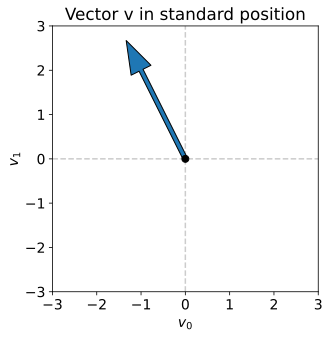

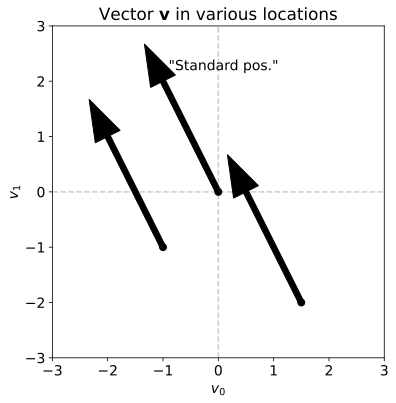

[1 2]
[ 4 -6]
[ 5 -4]
[1 2]
[ 4 -6]
[-3  8]
[-1.5 -2. ]
[1 2]
[4.5 5.5]


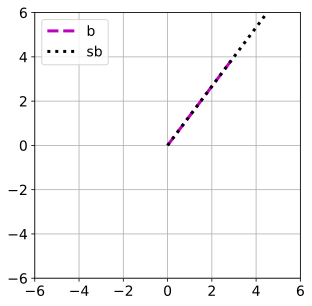

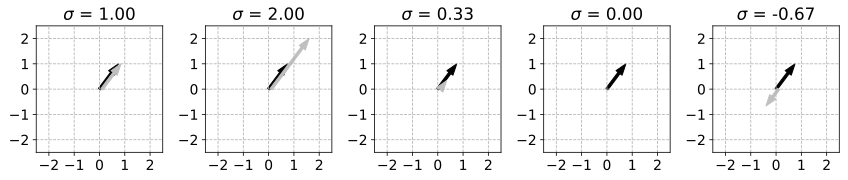

[[1 2 3]]
 
[[1]
 [2]
 [3]]
 
[[1 2 3]]
[1 2 3]
 
[1 2 3]
 
[1 2 3]


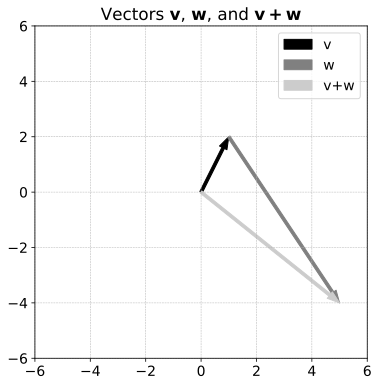

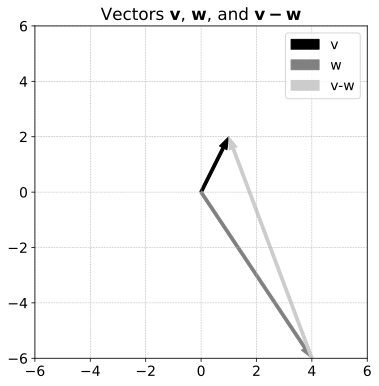

1.0
3.7416573867739413 3.7416573867739413
[0. 1. 0.]
[0. 1. 0.]
[ 0.83395039 -0.32075015  0.44905021]
 
15.588457268119896 0.9999999999999999




[4. 0. 0.]
1.0 4.0
[[1 2 3]]
 
[[1.]
 [2.]
 [3.]]
7.6809395363886965
7.680939536388697


/tmp/ipython-input-4065817491.py:272: RuntimeWarning: invalid value encountered in divide
  return v / mu


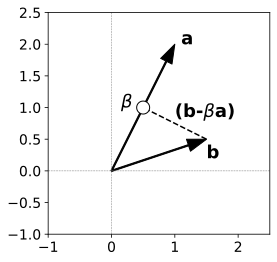

[-0.45579084  0.52030565]
[-0.45579084  0.52030565]
1.3877787807814457e-17


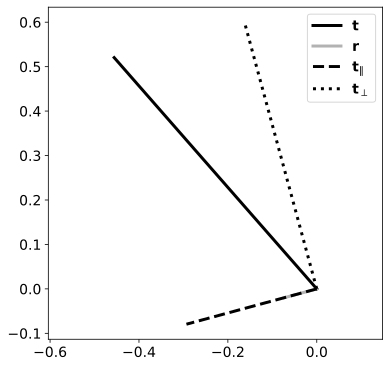

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# a vector as a Python list datatype
asList = [1,2,3]

# same numbers, but as a dimensionless numpy array
asArray = np.array([1,2,3])

# again same numbers, but now endowed with orientations
rowVec = np.array([ [1,2,3] ]) # row
colVec = np.array([ [1],[2],[3] ]) # column

# Note the use of spacing when defining the vectors; that is not necessary but makes the code more readable.

# Check the sizes of the variables
print(f'asList:  {np.shape(asList)}') # using np's shape function
print(f'asArray: {asArray.shape}') # using a method associated with numpy objects
print(f'rowVec:  {rowVec.shape}')
print(f'colVec:  {colVec.shape}')

# create a vector
v = np.array([-1,2])

# plot that vector (and a dot for the tail)
plt.arrow(0,0,v[0],v[1],head_width=.5,width=.1)
plt.plot(0,0,'ko',markerfacecolor='k',markersize=7)

# add axis lines
plt.plot([-3,3],[0,0],'--',color=[.8,.8,.8],zorder=-1)
plt.plot([0,0],[-3,3],'--',color=[.8,.8,.8],zorder=-1)

# make the plot look nicer
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.xlabel('$v_0$')
plt.ylabel('$v_1$')
plt.title('Vector v in standard position')
plt.show()

# A range of starting positions

startPos = [
            [0,0],
            [-1,-1],
            [1.5,-2]
            ]


# create a new figure
fig = plt.figure(figsize=(6,6))

for s in startPos:

  # plot that vector (and a dot for the tail)
  # note that plt.arrow automatically adds an offset to the third/fourth inputs
  plt.arrow(s[0],s[1],v[0],v[1],head_width=.5,width=.1,color='black')
  plt.plot(s[0],s[1],'ko',markerfacecolor='k',markersize=7)

  # indicate the vector in its standard position
  if s==[0,0]:
    plt.text(v[0]+.1,v[1]+.2,'"Standard pos."')


# add axis lines
plt.plot([-3,3],[0,0],'--',color=[.8,.8,.8],zorder=-1)
plt.plot([0,0],[-3,3],'--',color=[.8,.8,.8],zorder=-1)

# make the plot look nicer
plt.axis('square')
plt.axis([-3,3,-3,3])
plt.xlabel('$v_0$')
plt.ylabel('$v_1$')
plt.title('Vector $\mathbf{v}$ in various locations')
plt.savefig('Figure_02_01.png',dpi=300) # write out the fig to a file
plt.show()

# Using 2D vectors here instead of 3D vectors in the book to facilitate visualization
v = np.array([1,2])
w = np.array([4,-6])
vPlusW = v+w

# print out all three vectors
print(v)
print(w)
print(vPlusW)

# Note that here we don't need to worry about vector orientation (row vs. column),
# so for simplicity the vectors are created orientationless.

# Where's the code to generate Figure 3-2?
# It's exercise 0!

# Same v and w as above for comparison
vMinusW = v-w

# print out all three vectors
print(v)
print(w)
print(vMinusW)

# Code for Figure 3-2 is part of Exercise 0.

# a scalar
s = -1/2

# a vector
b = np.array([3,4])

# print them
print(b*s)

# Question: Does vector b need to be a numpy array? What happens if it's a list?

# Scalar-vector addition
s = 3.5

print(v)
print(s+v)

# plot
plt.plot([0,b[0]],[0,b[1]],'m--',linewidth=3,label='b')
plt.plot([0,s*b[0]],[0,s*b[1]],'k:',linewidth=3,label='sb')

plt.grid()
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend()
plt.show()

# Effects of different scalars

# a list of scalars:
scalars = [ 1, 2, 1/3, 0, -2/3 ]

baseVector = np.array([ .75,1 ])

# create a figure
fig,axs = plt.subplots(1,len(scalars),figsize=(12,3))
i = 0 # axis counter

for s in scalars:

  # compute the scaled vector
  v = s*baseVector

  # plot it
  axs[i].arrow(0,0,baseVector[0],baseVector[1],head_width=.3,width=.1,color='k',length_includes_head=True)
  axs[i].arrow(.1,0,v[0],v[1],head_width=.3,width=.1,color=[.75,.75,.75],length_includes_head=True)
  axs[i].grid(linestyle='--')
  axs[i].axis('square')
  axs[i].axis([-2.5,2.5,-2.5,2.5])
  axs[i].set(xticks=np.arange(-2,3), yticks=np.arange(-2,3))
  axs[i].set_title(f'$\sigma$ = {s:.2f}')
  i+=1 # update axis counter

plt.tight_layout()
plt.savefig('Figure_02_03.png',dpi=300)
plt.show()


# Row vector
r = np.array([ [1,2,3] ])

# orientationless array
l = np.array([1,2,3])

# print out the vector, its transpose, and its double-transpose
print(r), print(' ')

# Transpose the row vector
print(r.T), print(' ')

# double-transpose
print(r.T.T)

# Same for the orientationless array
print(l), print(' ')
print(l.T), print(' ')
print(l.T.T)



# just some random vectors...
v = np.array([ 0,1,2 ])
w = np.array([ 3,5,8 ])
u = np.array([ 13,21,34 ])

# two ways to comptue
res1 = np.dot( v, w+u )
res2 = np.dot( v,w ) + np.dot( v,u )

# show that they are equivalent
res1,res2



# The vectors
v = np.array([1,2])
w = np.array([4,-6])
vPlusW = v+w


# now plot all three vectors
plt.figure(figsize=(6,6))

a1 = plt.arrow(0,0,v[0],v[1],head_width=.3,width=.1,color='k',length_includes_head=True)
a2 = plt.arrow(v[0],v[1],w[0],w[1],head_width=.3,width=.1,color=[.5,.5,.5],length_includes_head=True)
a3 = plt.arrow(0,0,vPlusW[0],vPlusW[1],head_width=.3,width=.1,color=[.8,.8,.8],length_includes_head=True)


# make the plot look a bit nicer
plt.grid(linestyle='--',linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v+w'])
plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v+w}$')
plt.savefig('Figure_02_02a.png',dpi=300) # write out the fig to a file
plt.show()

# vector difference
vMinusW = v-w


# now plot all three vectors
plt.figure(figsize=(6,6))

a1 = plt.arrow(0,0,v[0],v[1],head_width=.3,width=.1,color='k',length_includes_head=True)
a2 = plt.arrow(0,0,w[0],w[1],head_width=.3,width=.1,color=[.5,.5,.5],length_includes_head=True)
a3 = plt.arrow(w[0],w[1],vMinusW[0],vMinusW[1],head_width=.3,width=.1,color=[.8,.8,.8],length_includes_head=True)


# make the plot look a bit nicer
plt.grid(linestyle='--',linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v-w'])
plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v-w}$')
plt.savefig('Figure_02_02b.png',dpi=300)
plt.show()




# the function
def normOfVect(v):
  return np.sqrt(np.sum(v**2))

# test it on a unit-norm vector
w = np.array([0,0,1])
print( normOfVect(w) )

# non-unit-norm vector, and confirm using np.linalg.norm
w = np.array([1,2,3])
print( normOfVect(w),np.linalg.norm(w) )




# define function
def createUnitVector(v):
  # get vector norm
  mu = np.linalg.norm(v)
  # return unit vector
  return v / mu


# test on a unit vector
w = np.array([0,1,0])
print( createUnitVector(w) )

# test on a non-unit vector that is easy to confirm
w = np.array([0,3,0])
print( createUnitVector(w) )

# test on a non-unit vector
w = np.array([13,-5,7])
uw = createUnitVector(w)
print( uw ), print(' ')
# confirm the vectors' norms
print( np.linalg.norm(w),np.linalg.norm(uw) )

# what happens with the zeros vector?
print('\n\n\n') # just some spaces
createUnitVector( np.zeros((4,1)) )



# define the function
def createMagVector(v,mag):
  # get vector norm
  mu = np.linalg.norm(v)
  # return unit vector
  return mag * v / mu

# test on a vector that is easy to confirm
w = np.array([1,0,0])
mw = createMagVector(w,4)
print( mw )

# confirm the vectors' norms
print( np.linalg.norm(w),np.linalg.norm(mw) )




# the row vector to transpose
v = np.array([[1,2,3]])

# initialize the column vector
vt = np.zeros((3,1))

# direct implementation of the formula using a for loop
for i in range(v.shape[1]):
  vt[i,0] = v[0,i]

# confirm!
print(v), print(' ')
print(vt)

# Note about data types: The two vectors actually have different data types
#  (ints vs. floats). That happened because I defined v using ints while the default type
#  for np.zeros is float. You can match data types in several ways, including:
#  (1) write 3. instead of 3 when creating v; (2) use dtype=np.float as an optional input.



# some vector
c = np.random.randn(5)

# squared norm as dot product with itself
sqrNrm1 = np.dot(c,c)

# squared norm via our function from exercise 1
sqrNrm2 = normOfVect(c)**2

# print both to confirm they're the same
print( sqrNrm1 )
print( sqrNrm2 )



# dimensionality
n = 11

# some random column vectors
a = np.random.randn(n,1)
b = np.random.randn(n,1)

# dot products both ways
atb = np.sum(a*b)
bta = np.sum(b*a)

# they're equal if their difference is 0
atb - bta

# For an extra challenge, see what happens when you use np.dot() to compute the dot products.

# the vectors a and b
a = np.array([1,2])
b = np.array([1.5,.5])

# compute beta
beta = np.dot(a,b) / np.dot(a,a)

# compute the projection vector (not explicitly used in the plot)
projvect = b - beta*a


# draw the figure
plt.figure(figsize=(4,4))

# vectors
plt.arrow(0,0,a[0],a[1],head_width=.2,width=.02,color='k',length_includes_head=True)
plt.arrow(0,0,b[0],b[1],head_width=.2,width=.02,color='k',length_includes_head=True)

# projection vector
plt.plot([b[0],beta*a[0]],[b[1],beta*a[1]],'k--')

# projection on a
plt.plot(beta*a[0],beta*a[1],'ko',markerfacecolor='w',markersize=13)

# make the plot look nicer
plt.plot([-1,2.5],[0,0],'--',color='gray',linewidth=.5)
plt.plot([0,0],[-1,2.5],'--',color='gray',linewidth=.5)

# add labels
plt.text(a[0]+.1,a[1],'a',fontweight='bold',fontsize=18)
plt.text(b[0],b[1]-.3,'b',fontweight='bold',fontsize=18)
plt.text(beta*a[0]-.35,beta*a[1],r'$\beta$',fontweight='bold',fontsize=18)
plt.text((b[0]+beta*a[0])/2,(b[1]+beta*a[1])/2+.1,r'(b-$\beta$a)',fontweight='bold',fontsize=18)

# some finishing touches
plt.axis('square')
plt.axis([-1,2.5,-1,2.5])
plt.show()



# generate random R2 vectors (note: no orientation here! we don't need it for this exercise)
t = np.random.randn(2)
r = np.random.randn(2)

# the decomposition
t_para = r * (np.dot(t,r) / np.dot(r,r))
t_perp = t - t_para

# confirm that the two components sum to the target
print(t)
print( t_para+t_perp )

# confirm orthogonality (dot product must be zero!)
print( np.dot(t_para,t_perp) )
# Note about this result: Due to numerical precision errors,
#   you might get a result of something like 10^-17, which can be interpretd as zero.



# draw them!
plt.figure(figsize=(6,6))

# draw main vectors
plt.plot([0,t[0]],[0,t[1]],color='k',linewidth=3,label=r'$\mathbf{t}$')
plt.plot([0,r[0]],[0,r[1]],color=[.7,.7,.7],linewidth=3,label=r'$\mathbf{r}$')

# draw decomposed vector components
plt.plot([0,t_para[0]],[0,t_para[1]],'k--',linewidth=3,label=r'$\mathbf{t}_{\|}$')
plt.plot([0,t_perp[0]],[0,t_perp[1]],'k:',linewidth=3,label=r'$\mathbf{t}_{\perp}$')

plt.axis('equal')
plt.legend()
plt.savefig('Figure_02_08.png',dpi=300)
plt.show()

# Replace t_para in the previous exercise with the line below:
t_para = r * (np.dot(t,r) / np.dot(t,t))


### Matrices (Rank 2 Tensors) in NumPy

In [ ]:
# Use array() with nested brackets:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.shape

(3, 2)

In [ ]:
X.size

6

In [ ]:
# Select left column of matrix X (zero-indexed)
X[:,0]

array([25,  5,  3])

In [ ]:
# Select middle row of matrix X:
X[1,:]

array([ 5, 26])

In [ ]:
# Another slicing-by-index example:
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])


### Matrices in PyTorch

In [ ]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [14]:
X_pt.shape

torch.Size([3, 2])

In [ ]:
X_pt[1,:] # Python is zero-indexed

tensor([ 5, 26])

### Matrices in TensorFlow

In [ ]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [ ]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2], dtype=int32)>

In [ ]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26], dtype=int32)>

### Higher-Rank Tensors

As an example, rank 4 tensors are common for images, where each dimension corresponds to:

1. Number of images in training batch, e.g., 32
2. Image height in pixels, e.g., 28 for [MNIST digits](http://yann.lecun.com/exdb/mnist/)
3. Image width in pixels, e.g., 28
4. Number of color channels, e.g., 3 for full-color images (RGB)

In [15]:
images_pt = torch.zeros([32, 28, 28, 3])

In [ ]:
#images_pt

In [17]:
images_tf = tf.zeros([32, 28, 28, 3])

In [19]:
# images_tf